In [14]:
import numpy as np
from tools import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
infos = get_file_info(data_paths[0])

In [16]:
infos

{'filename': '100307_MEG_3-Restin_rmegpreproc.mat',
 'subject_id': '100307',
 'session_id': '3-Restin'}

In [17]:
data = extract_data(data_paths[0])

Sensor channel position (271, 3) extracted...
Sensor channel type (271,) extracted...
Sensor channel label (271,) extracted...
Sampling frequency 508.62752490487884 extracted ...
Labels after preprocessing (241,) extracted ...
Trials after preprocessing (241, 1018, 147) extracted ...
The time course of the trials (1018,) extracted ...


In [19]:
def correlation_over_time(data, k):
    trials = data['trial']
    
    concat_trials = concatenate_trials(trials)
    
    available_channels = get_available_channels(data)
    orders = ordering(available_channels, data['label'])
    avail_trials = concat_trials[orders,:]
    
    corr = xt_xt_plus_k_corr(avail_trials, k)
    savepath = 'output/{}_{}_xt_xt_plus_{}.png'.format(infos['subject_id'], infos['session_id'], str(k))
    plot_correlation(corr, title=' Correlation Matrix - k='+str(k),
                     vrange=[], figure_size=(50, 40), zero_diagonal=False,
                     filename=savepath)
    
    
    

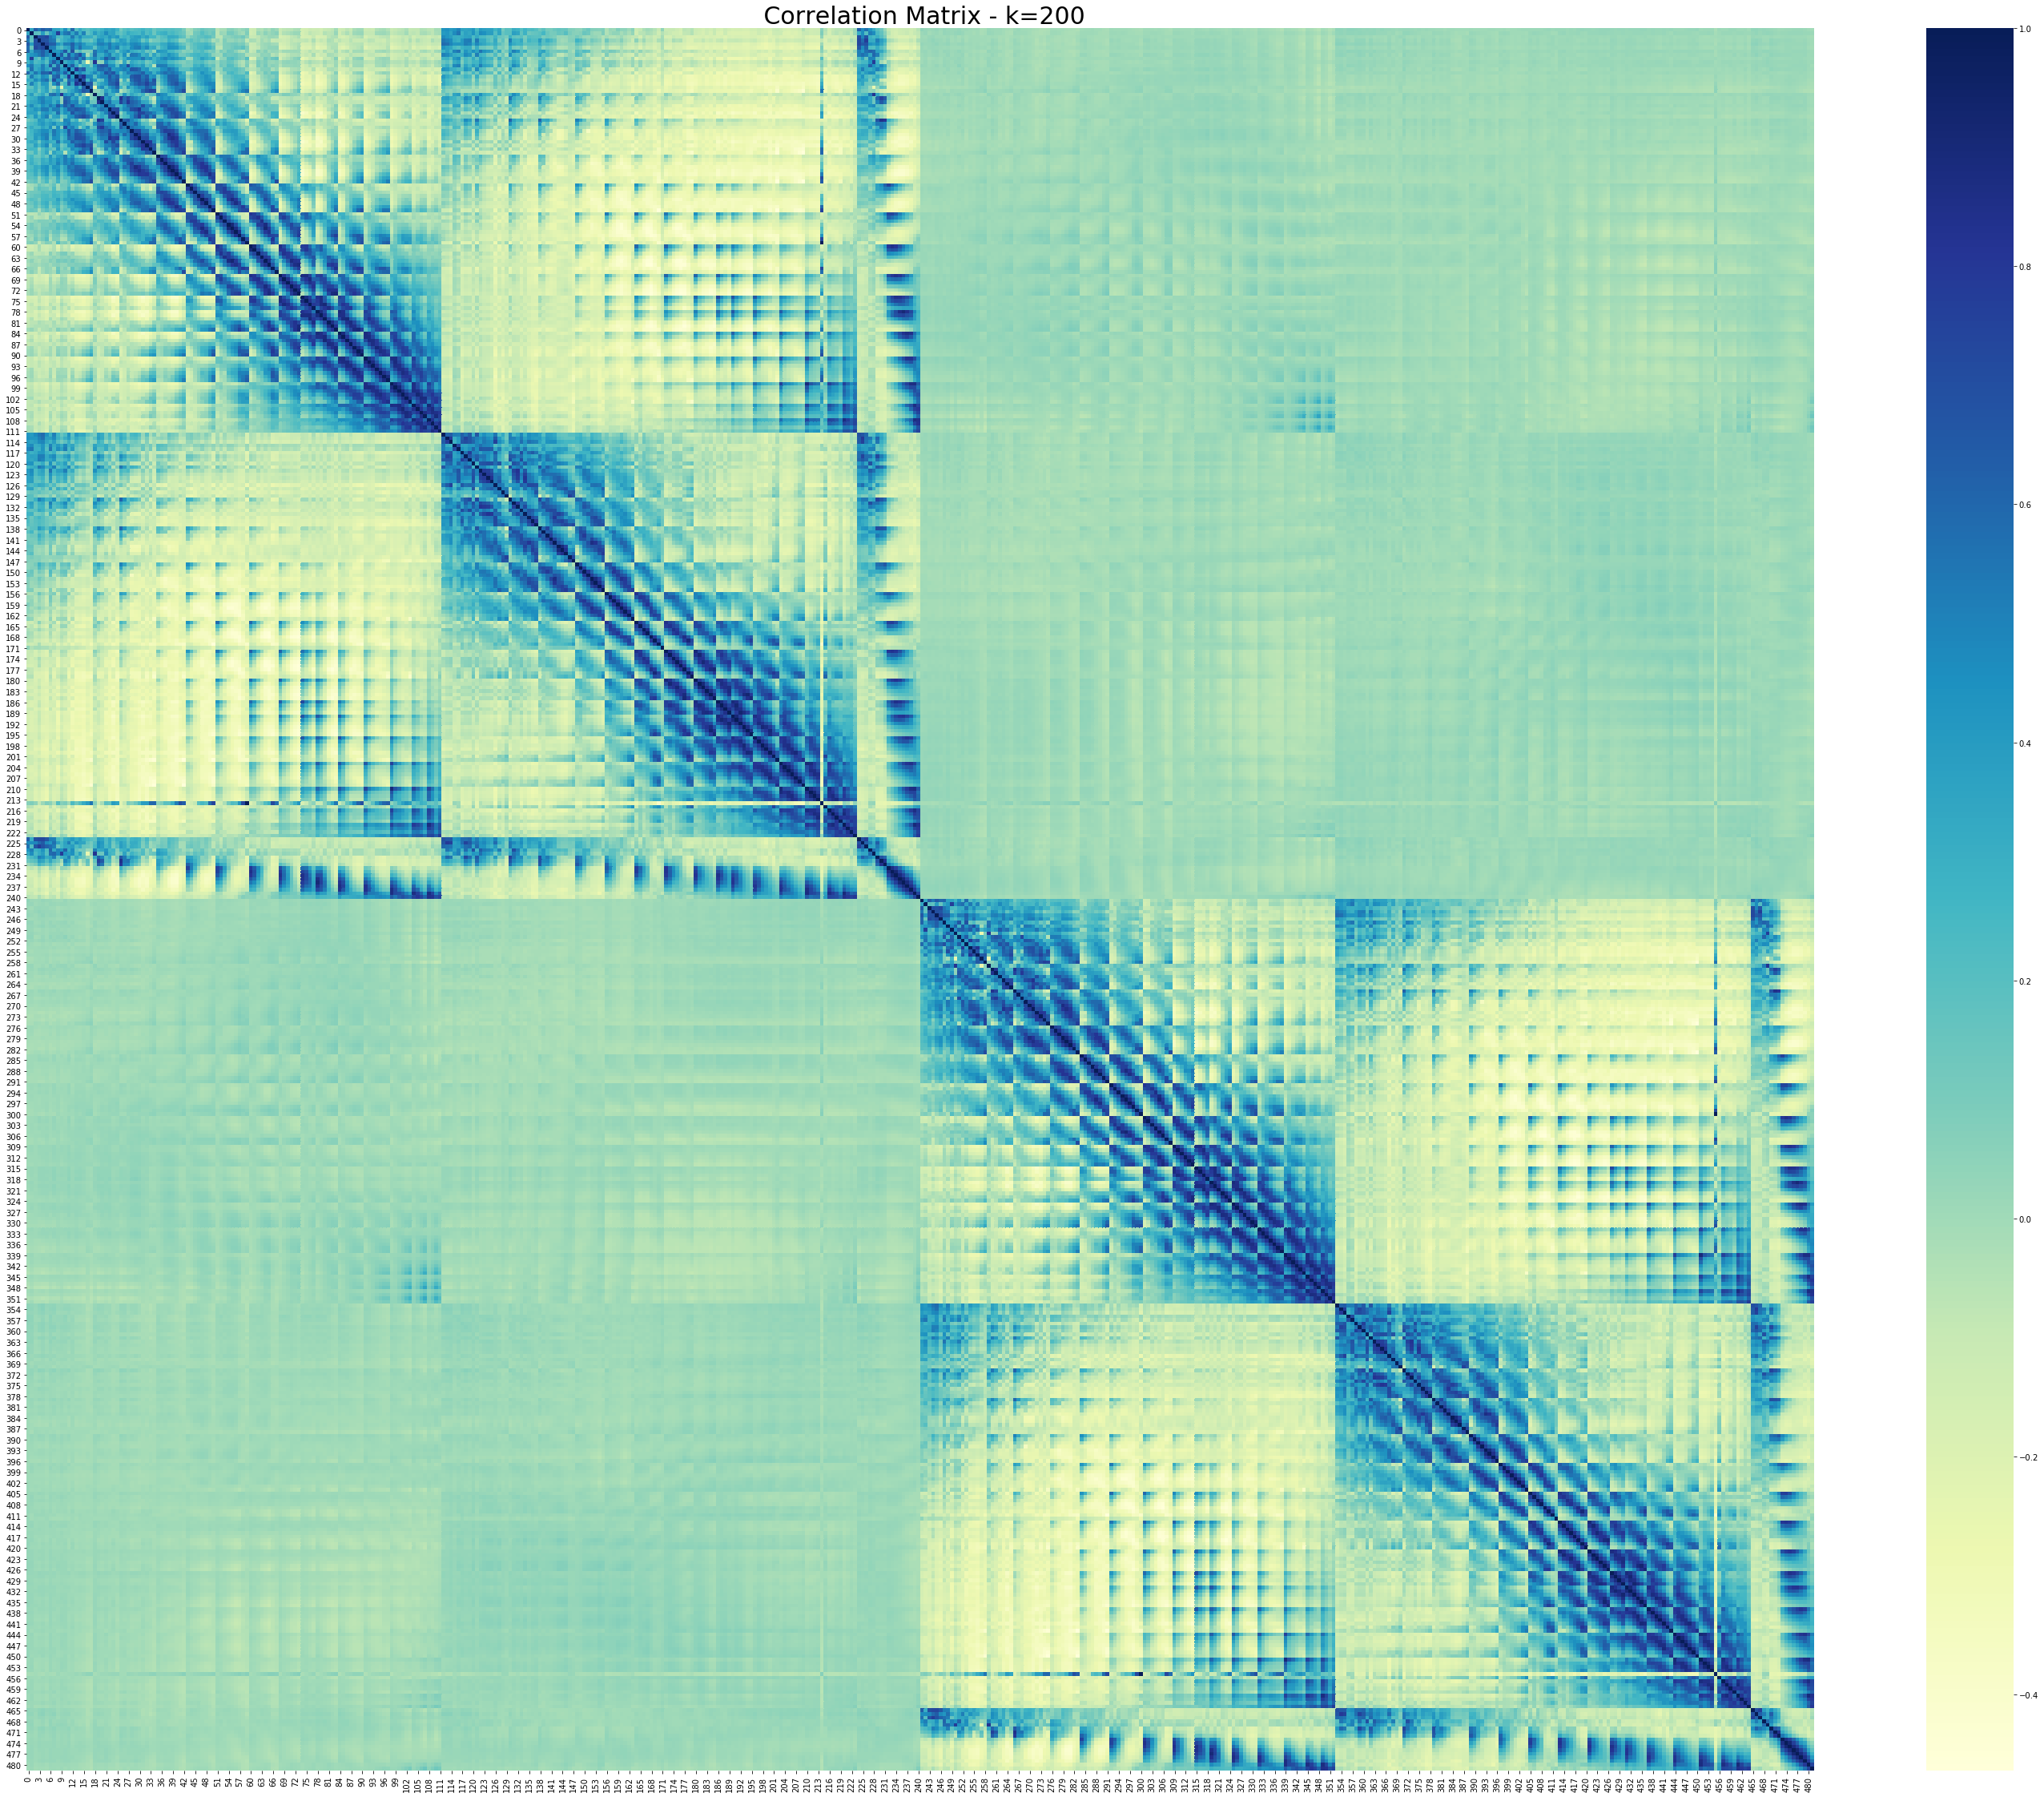

<Figure size 432x288 with 0 Axes>

In [23]:
correlation_over_time(data,200)

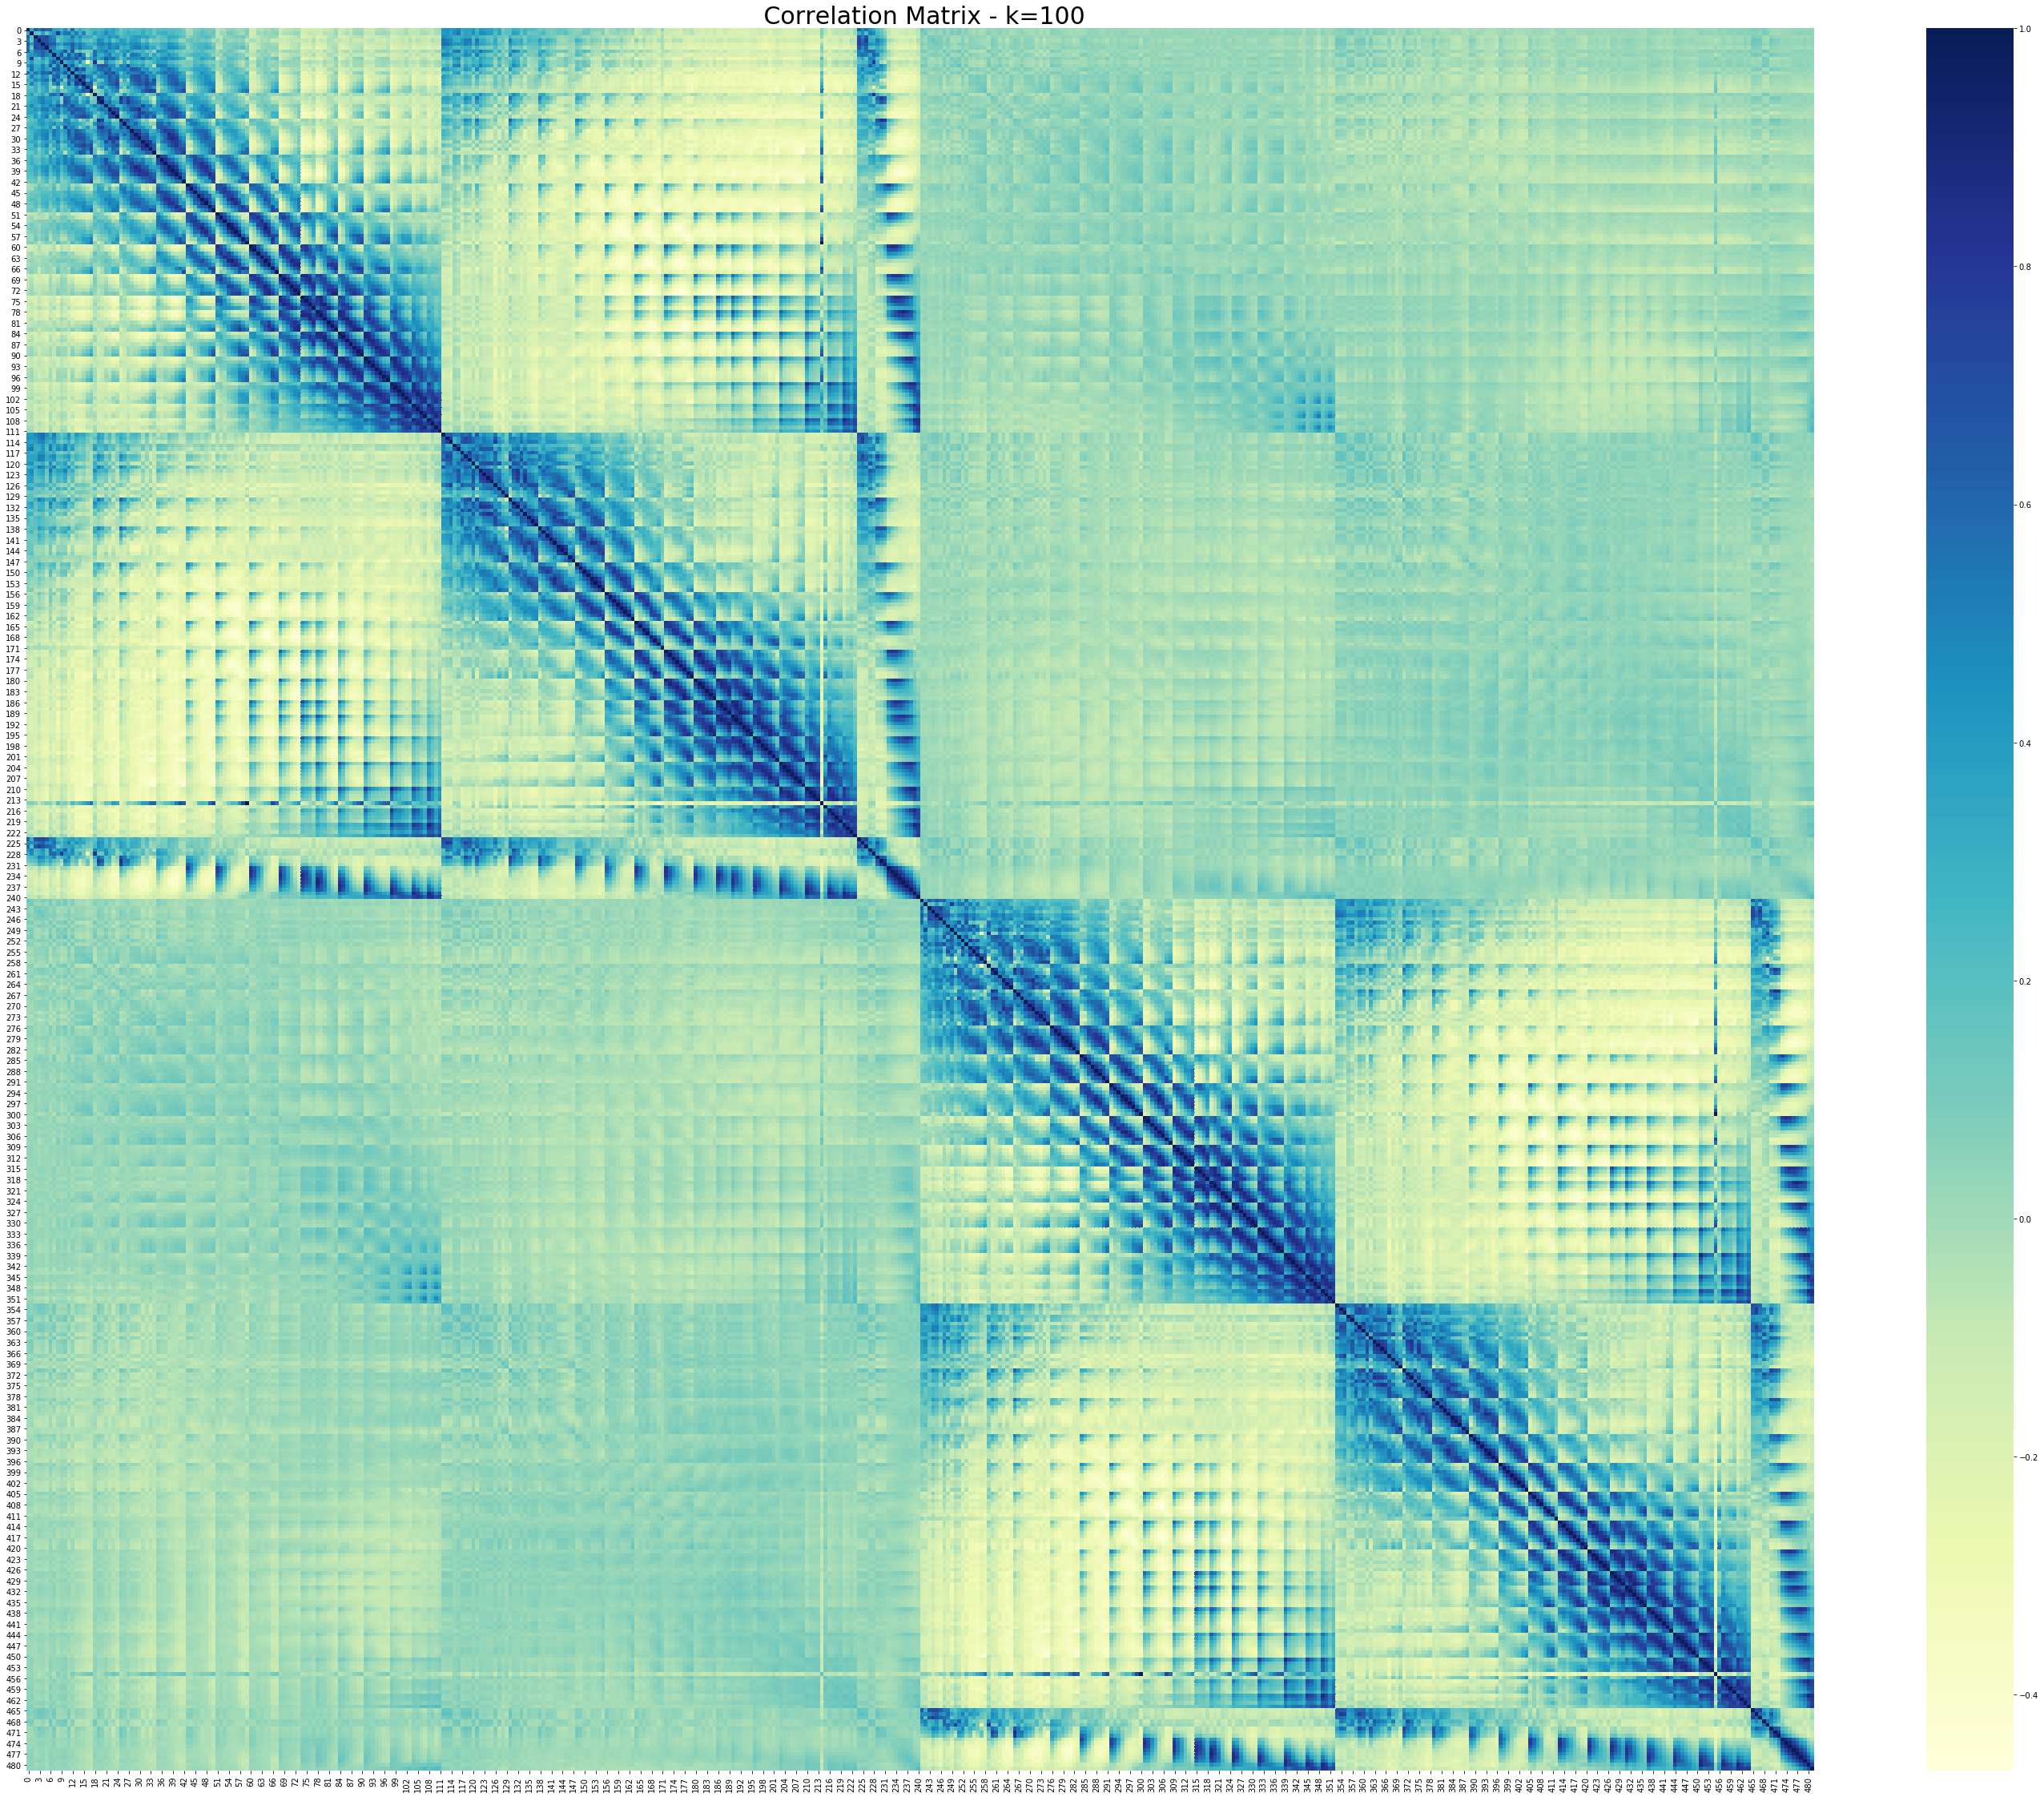

<Figure size 432x288 with 0 Axes>

In [20]:
correlation_over_time(data,100)

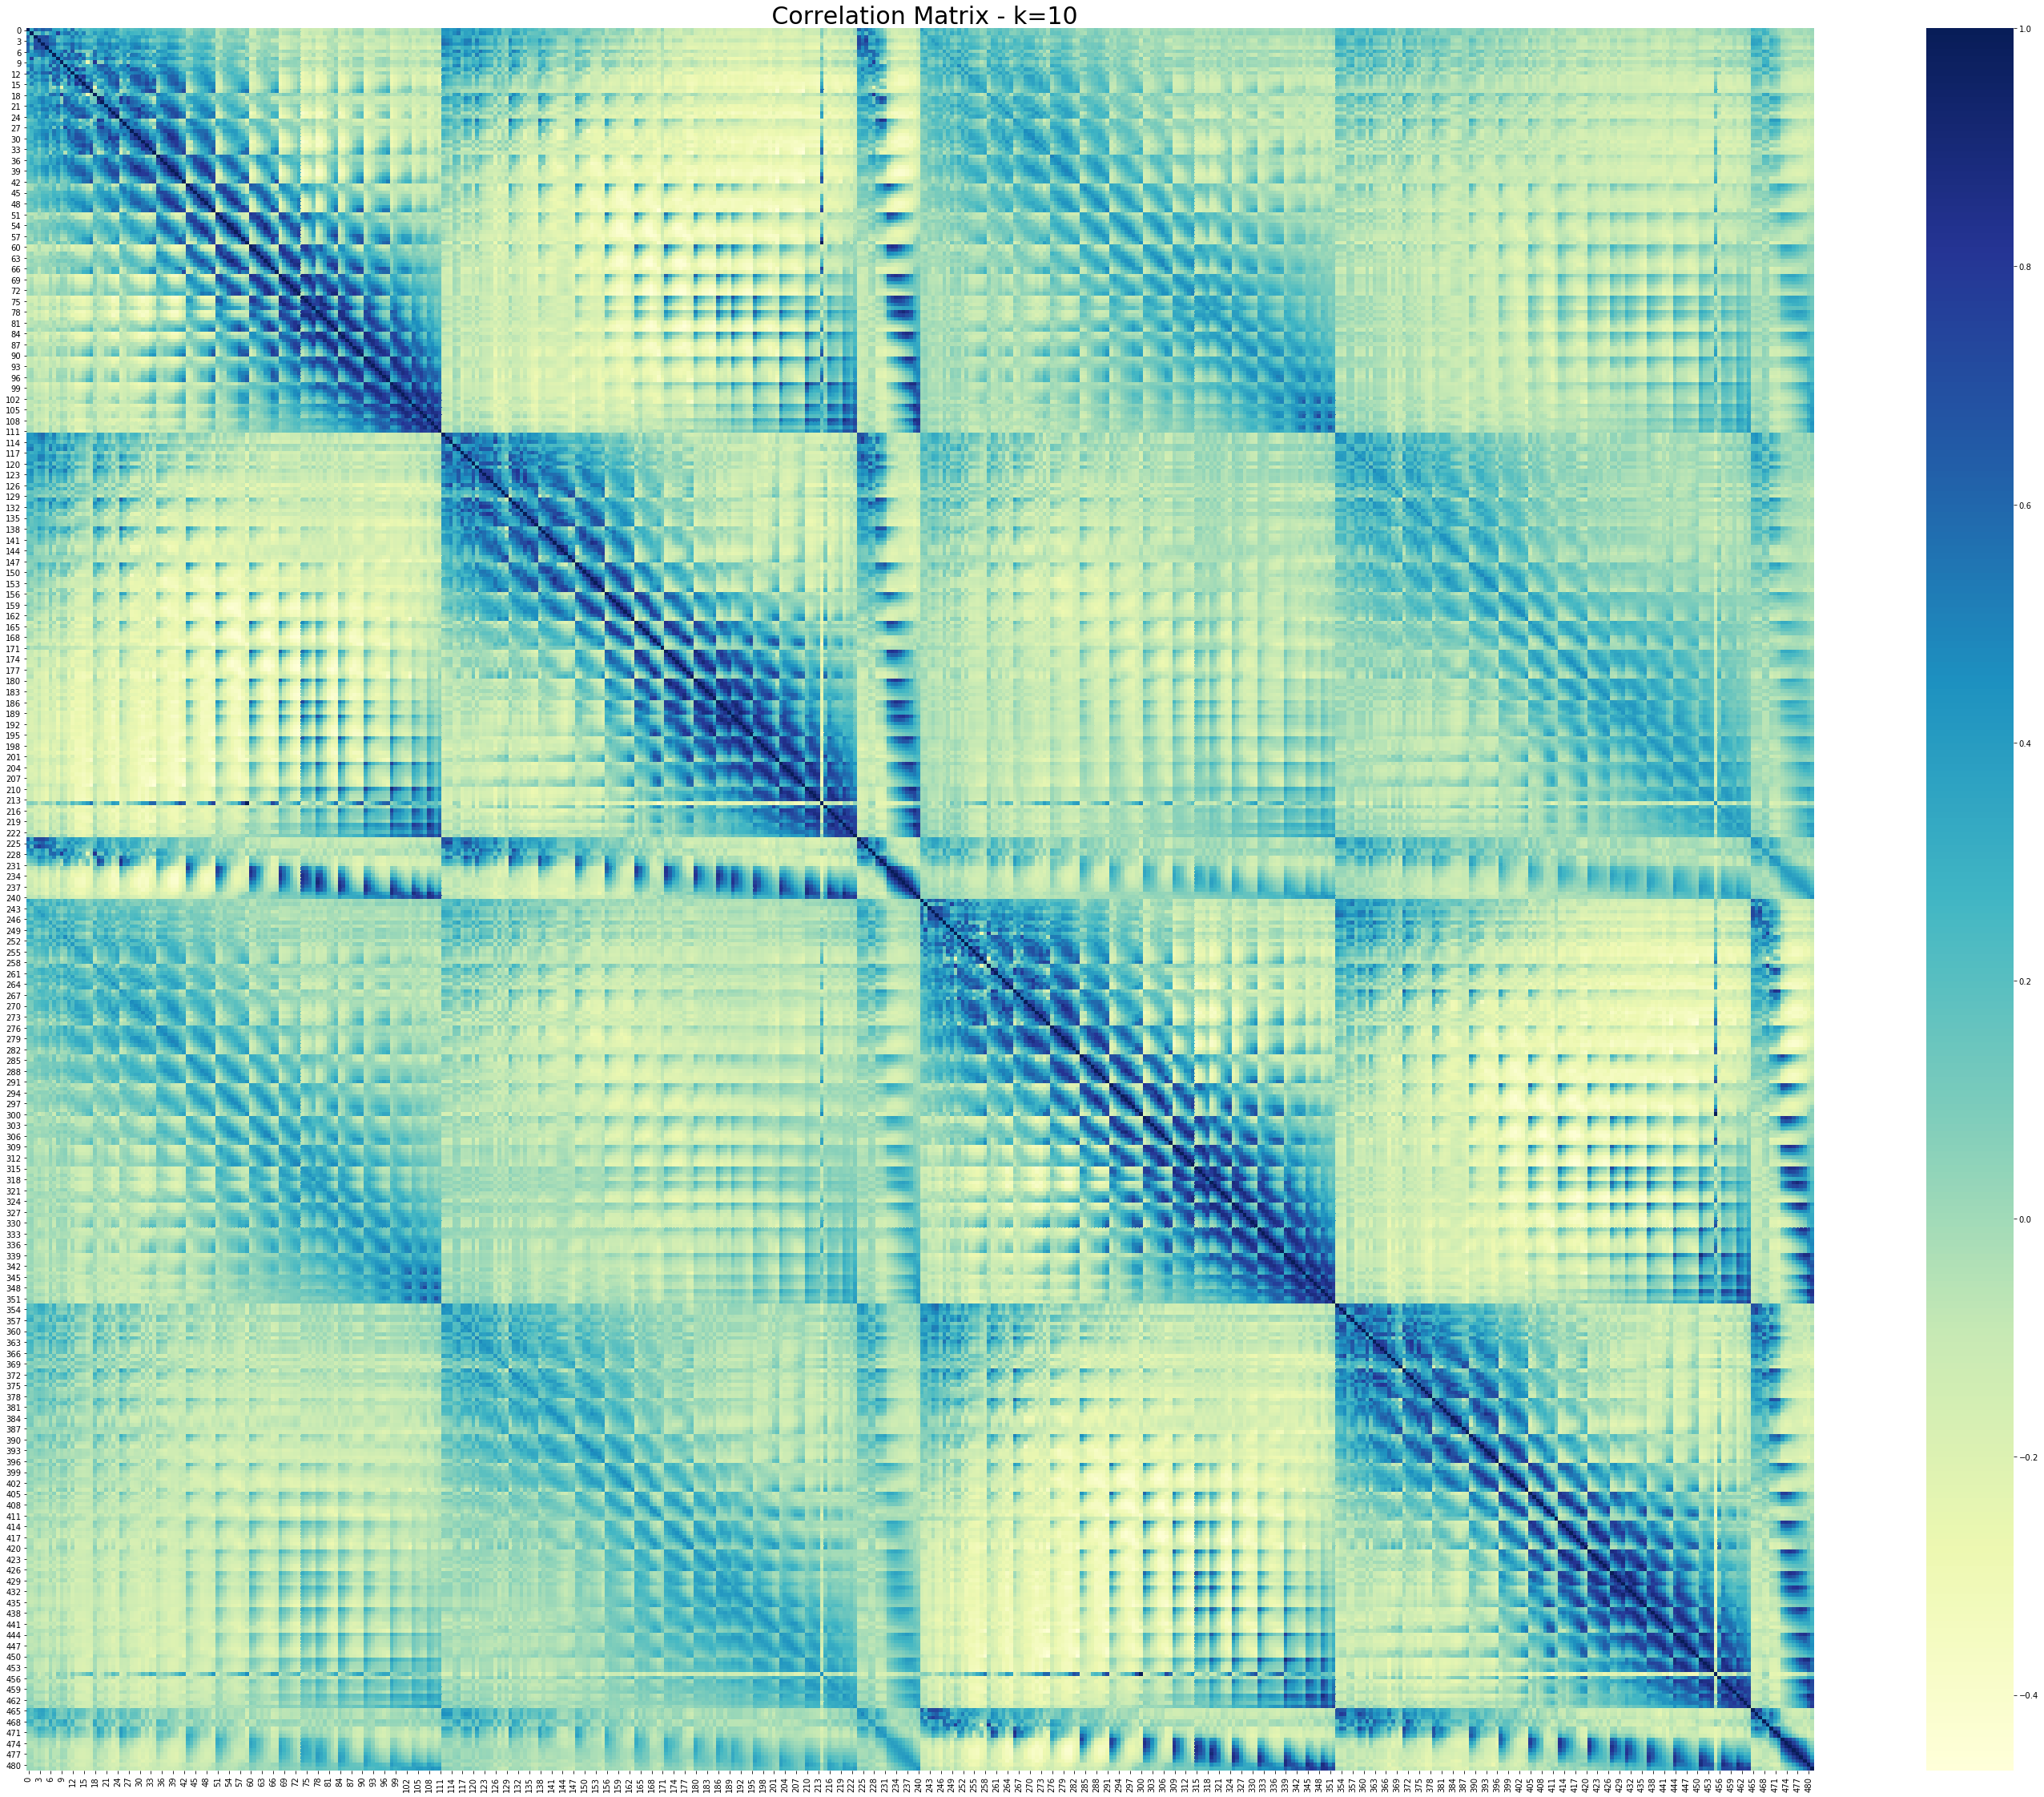

<Figure size 432x288 with 0 Axes>

In [21]:
correlation_over_time(data,10)

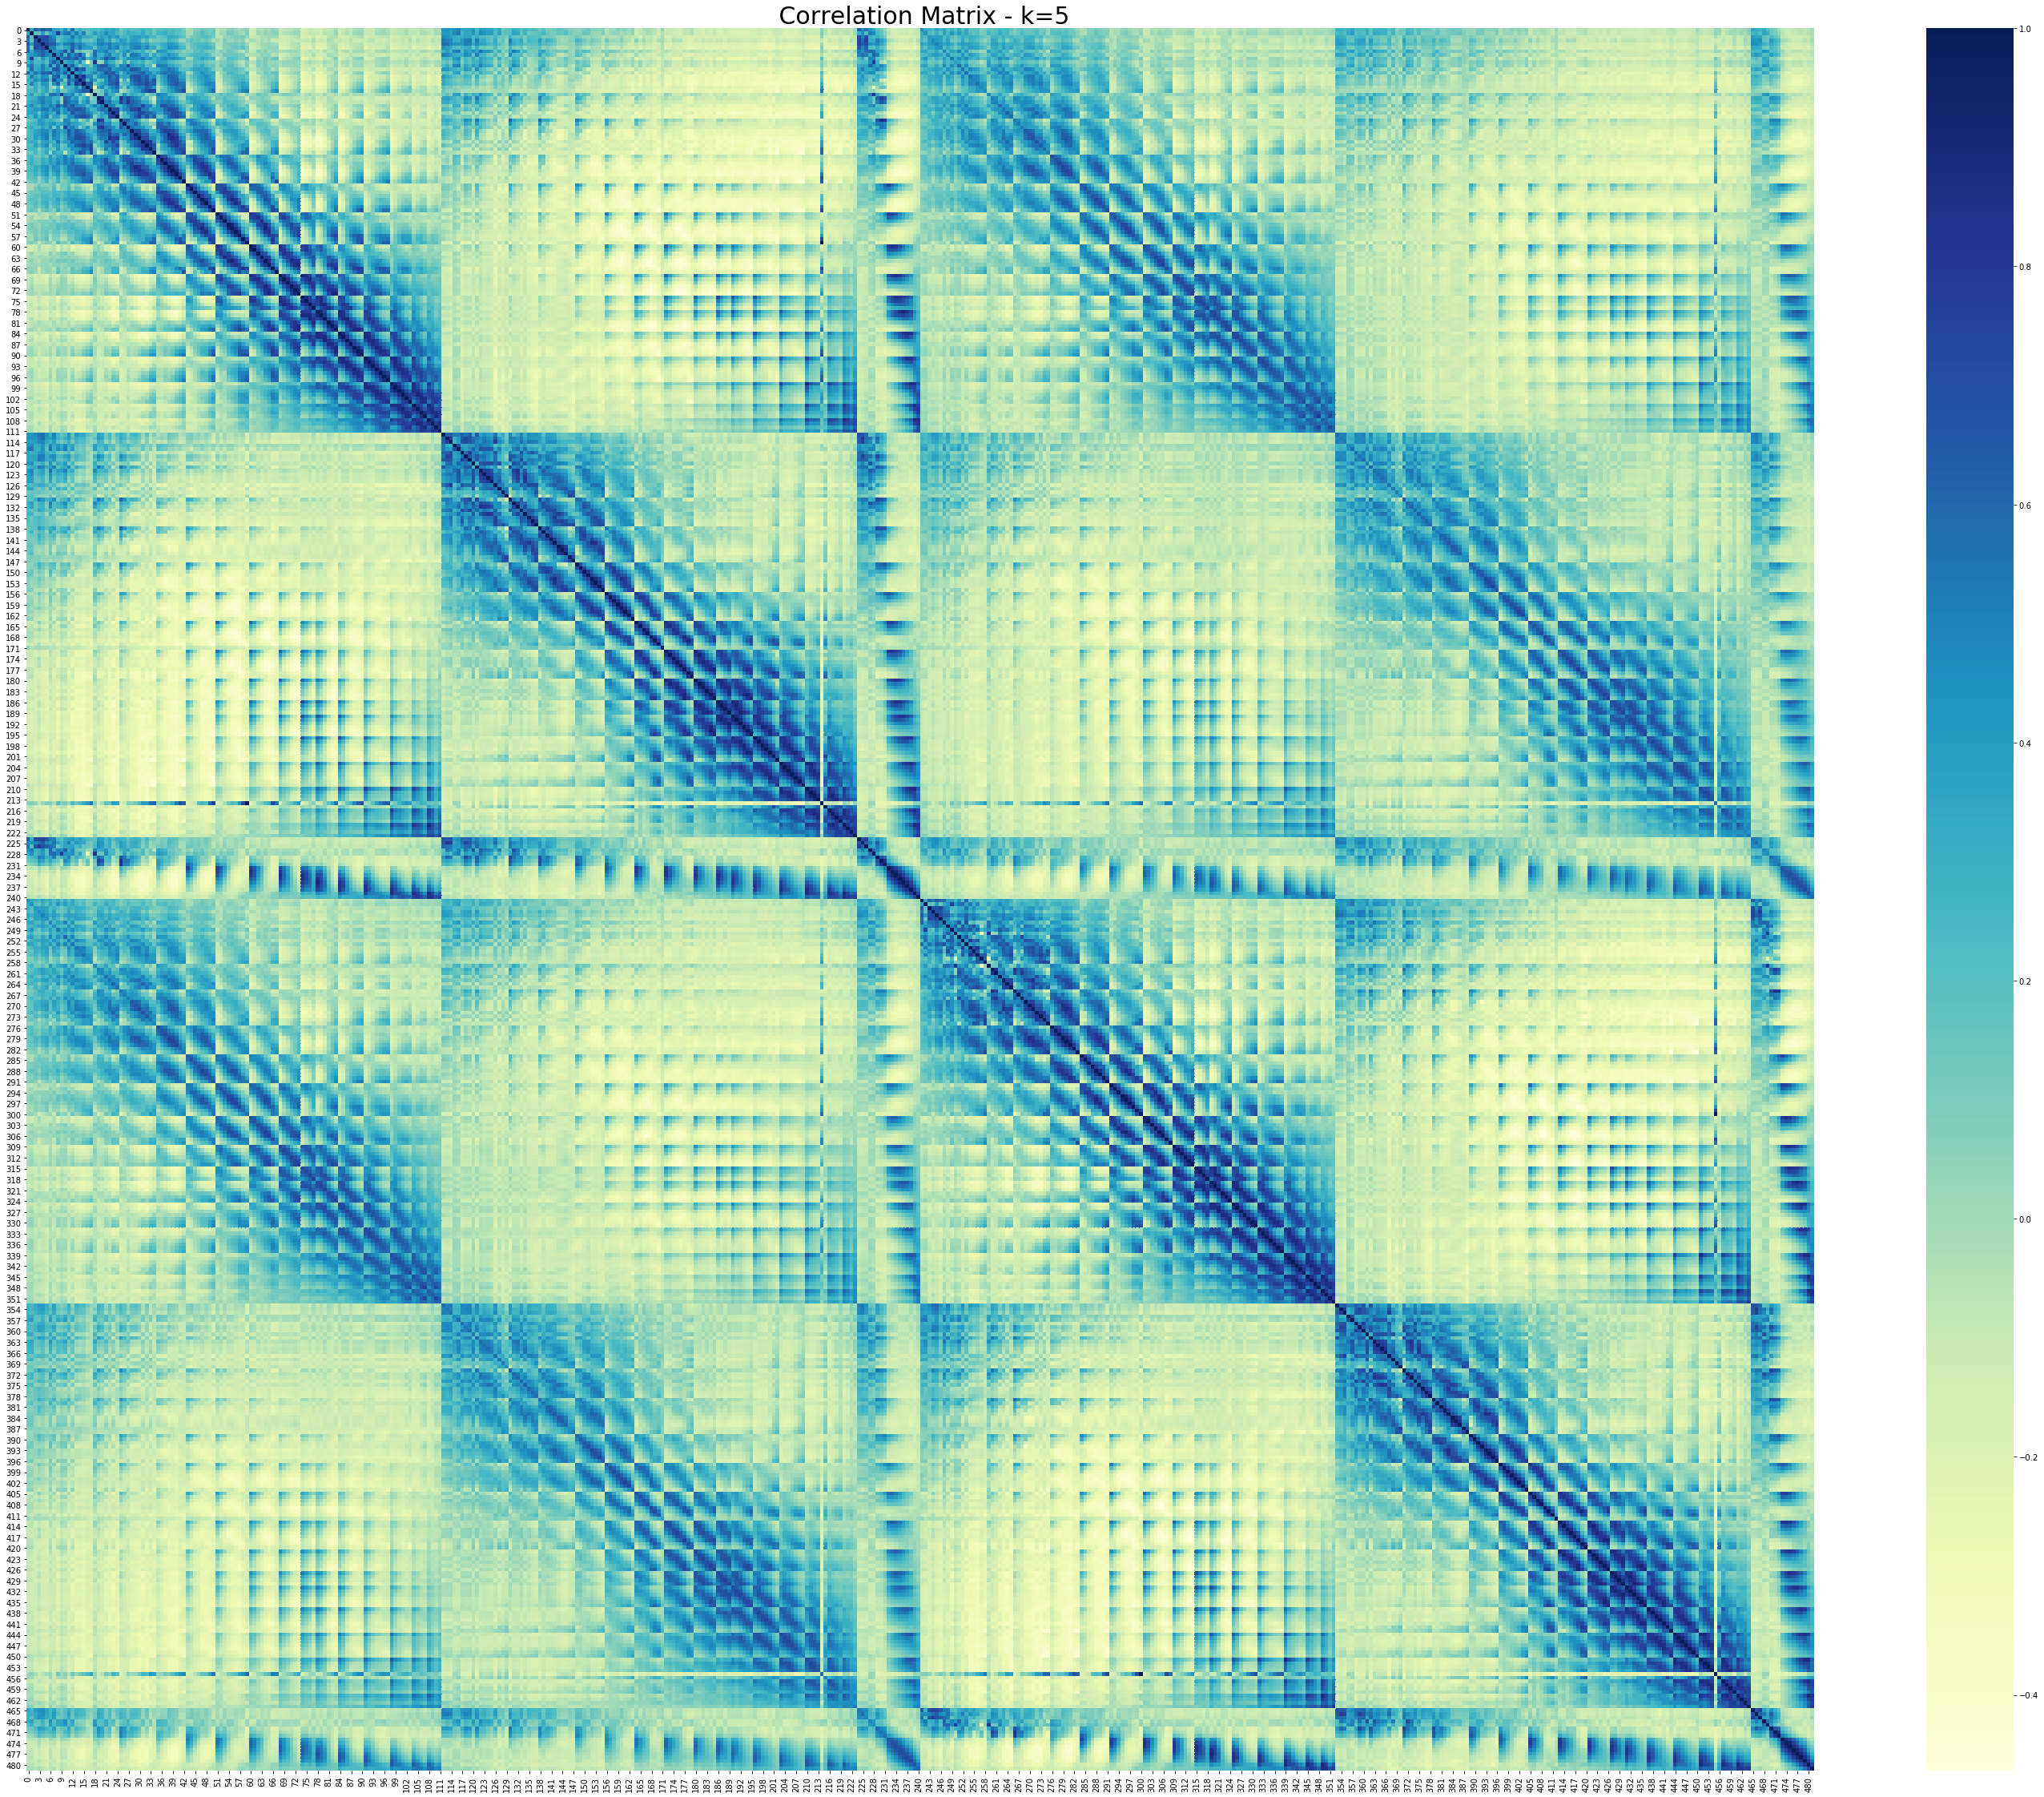

<Figure size 432x288 with 0 Axes>

In [22]:
correlation_over_time(data,5)